# Diagrama de Voronoi

O conceito de diagramas de Voronoi remonta a tempos antigos, mas foi formalizado pelo matemático russo Georgy Voronoi no início do século 20. Voronoi, pioneiro na teoria dos números e na geometria das formas, publicou trabalhos sobre partições de espaços que hoje conhecemos como diagramas de Voronoi. Antes dele, Johann Dirichlet havia estudado formas similares em 1850, conhecidas como tesselações de Dirichlet. Por isso, os diagramas de Voronoi às vezes são chamados de tesselações de Voronoi-Dirichlet.

Um diagrama de Voronoi é uma partição do espaço em regiões baseadas em um conjunto de pontos geradores. Cada ponto gerador tem uma região correspondente, que consiste em todos os pontos mais próximos a ele do que a qualquer outro gerador. As bordas dessas regiões são equidistantes aos pontos geradores vizinhos.

### Propriedades dos Diagramas de Voronoi

1. **Unicidade**: Dado um conjunto de pontos geradores, a tesselação de Voronoi é única.
2. **Convexidade**: Cada célula de Voronoi é convexa.
3. **Generalização**: Podem ser aplicados a espaços de dimensões superiores.

### Aplicações dos Diagramas de Voronoi

1. **Computação Gráfica**: Utilizados em algoritmos de renderização e simulação de fenômenos naturais.
2. **Divisões Políticas e Regionais**: Criam fronteiras políticas e regionais que minimizam a distância média dos habitantes a uma capital ou centro administrativo.
3. **Ecologia**: Modelam o território de diferentes espécies animais ou plantas.
4. **Modelagem de Mercados**: Analisam a divisão de mercado entre competidores, onde cada competidor tem uma "região de Voronoi" correspondente aos consumidores mais próximos.
5. **Localização de Serviços**: Utilizados na localização de serviços como postos de saúde, escolas e supermercados. Por exemplo, no planejamento urbano, um diagrama de Voronoi pode ajudar a determinar a melhor localização para Unidades Básicas de Saúde (UBS), garantindo que cada região urbana tenha acesso equitativo aos serviços de saúde.

Nosso objetivo será aplicar a construção do diagrama de Voronoi para responder perguntas relacionadas às UBS do município de Maringá, utilizando dados geoespaciais disponíveis e o diagrama de Voronoi. Por exemplo, considere a seguinte pergunta:

**Como determinar qual UBS de Maringá tem, em teoria, maior demanda de pacientes?**

Pretendemos responder este tipo de pergunta. Contudo, antes, veremos a construção do diagrama de Voronoi de duas formas:

1. **Coloração da Tesselação**: Delimita a área de atuação do diagrama.
2. **Triangulação de Delaunay**: Permite encontrar a configuração completa do diagrama.

## Triangulação de Delaunay

A triangulação de Delaunay é um conceito fundamental na geometria computacional, com aplicações que abrangem desde a ciência dos materiais até a visualização de dados. Nomeada em homenagem ao matemático russo Boris Delaunay, que a descreveu em 1934, a triangulação de Delaunay é uma forma de conectar um conjunto de pontos de modo a formar triângulos que atendem a uma condição específica de maximização do menor ângulo interno.

### Definição e Propriedades

A triangulação de Delaunay para um conjunto de pontos no plano é tal que nenhum ponto está dentro do círculo circunscrito de qualquer triângulo da triangulação. Esta característica leva a várias propriedades importantes:

1. **Maximização dos ângulos mínimos**: A triangulação de Delaunay tende a evitar triângulos "achatados", maximizando o menor ângulo interno de todos os triângulos.
2. **Unicidade**: Para um conjunto de pontos em posição geral (nenhum quatro pontos co-circulares), a triangulação de Delaunay é única.
3. **Convexidade**: A união de todos os triângulos da triangulação de Delaunay forma o fecho convexo do conjunto de pontos.
4. **Proximidade**: Se dois pontos são vizinhos em uma triangulação de Delaunay, eles estão mais próximos um do outro do que qualquer outro ponto não vizinho.

### Construção

Existem vários algoritmos para construir a triangulação de Delaunay, incluindo:

1. **Incremental**: Adiciona pontos um a um, ajustando a triangulação para manter a propriedade de Delaunay.
2. **Divisão e Conquista**: Divide o conjunto de pontos em subconjuntos menores, triangula cada subconjunto e depois combina as triangulações.
3. **Varredura em Plano**: Varre o plano, adicionando e conectando pontos de forma ordenada.
4. **Flip de Arestas**: Começa com uma triangulação qualquer e ajusta as arestas iterativamente para satisfazer a propriedade de Delaunay.

### Aplicações

1. **Interpolação e Aproximação**: Na interpolação de superfícies e funções, a triangulação de Delaunay é usada para criar redes de triângulos que facilitam a interpolação linear.
2. **Modelagem de Terrenos**: Em sistemas de informações geográficas (SIG), a triangulação de Delaunay ajuda a modelar superfícies topográficas.
3. **Computação Gráfica**: Utilizada para gerar malhas de polígonos que modelam superfícies 3D.
4. **Análise de Dados**: Na visualização de dados e na análise espacial, para criar diagramas de Voronoi, que são a dualidade da triangulação de Delaunay.
5. **Simulação de Fluídos**: Em dinâmica dos fluídos, a triangulação de Delaunay é usada para discretizar domínios em simulações numéricas.

### Relação com o Diagrama de Voronoi

A triangulação de Delaunay e o diagrama de Voronoi são estruturas geométricas dualmente relacionadas. Enquanto o diagrama de Voronoi divide o espaço em regiões baseadas na proximidade a um conjunto de pontos geradores, a triangulação de Delaunay conecta esses pontos de forma a maximizar os menores ângulos dos triângulos resultantes. Os vértices do diagrama de Voronoi correspondem aos centros dos círculos circunscritos dos triângulos da triangulação de Delaunay.

![Dualidade entre a Triangulação de Delaunay e o Diagrama de Voronoi](dual.png)


Dada a importância da triangulação de Delaunay para a construção do diagrama de Voronoi, apresentaremos como essa pode ser construída. Retomemos a característica principal que destacamos: 
Um triângulo de Delaunay não contém outros pontos do conjunto. De forma equivalente, dada uma aresta da triangulação de Delaunay, dois semi-planos são obtidos. Um novo vértice será obtido a partir do pontos de cada semi-plano que maximizam o ângulo oposto à aresta da triângulação. Iniciaremos nossa abordagem por definir as estruturas que iremos utilizar. 

In [1]:

mutable struct Point2D
    x::Float64 
    y::Float64
end

struct Edge
    A::Point2D
    B::Point2D 
end
struct Triangle
    P1::Point2D
    P2::Point2D
    P3::Point2D 
end

Agora, iremos criar uma função que gera pontos aleatórios.

In [2]:
function generate_points(n::Int;limit=[0,100])
    x = rand([limit[1]:1:limit[2];],n)
    y = rand([limit[1]:1:limit[2];],n)
    v = Vector{Point2D}(undef,n)
    for i=1:n
        v[i] = Point2D(x[i],y[i])
    end 
    return v
end

generate_points (generic function with 1 method)

In [3]:
P = generate_points(10)

10-element Vector{Point2D}:
 Point2D(2.0, 70.0)
 Point2D(4.0, 38.0)
 Point2D(49.0, 61.0)
 Point2D(55.0, 26.0)
 Point2D(59.0, 50.0)
 Point2D(96.0, 61.0)
 Point2D(82.0, 25.0)
 Point2D(31.0, 33.0)
 Point2D(66.0, 79.0)
 Point2D(40.0, 77.0)

Para desenharmos os pontos iremos utilizar o pacote Plots.jl e o código abaixo. 

In [4]:
using Plots

function draw_points(v::Vector{Point2D},plt::Plots.Plot)
    x = [v[i].x for i=1:length(v)]
    y = [v[i].y for i=1:length(v)]
    scatter!(plt,x,y,legend=:false)
end



draw_points (generic function with 1 method)

In [5]:

function draw_edges(w::Vector{Edge},plt)
    for i=1:length(w)
        plot!(plt,[w[i].A.x,w[i].B.x],[w[i].A.y,w[i].B.y],color=:red,seriestype = :line)
    end
end

draw_edges (generic function with 1 method)

Precisamos ainda, criar funções auxiliares que nos permitam determinar qual lado um ponto está de um segmento e também, calcular ângulo entre pontos. 

In [6]:

using LinearAlgebra

function side(W::Edge,P::Point2D)
    return (W.B.x-W.A.x)*(P.y-W.A.y)-(W.B.y-W.A.y)*(P.x-W.A.x)
end

function pseudo_angle(W::Edge,P::Point2D)
    u = [W.B.x-W.A.x,W.B.y-W.A.y]
    v = [P.x-W.A.x,P.y-W.A.y]
    return 1-((u'*v)/(norm(u,2)*norm(v,2)))
end 

function pseudo_angle(P::Point2D,R::Point2D,Q::Point2D)
    u = [P.x-R.x,P.y-R.y]
    v = [Q.x-R.x,Q.y-R.y]
    return 1-((u'*v)/(norm(u,2)*norm(v,2)))
end

pseudo_angle (generic function with 2 methods)

Agora, vejamos o código da triangulação.

In [7]:
function delaunay(v::Vector{Point2D})
    # inicialização
    w = Vector{Edge}[]
    # vamos determinar uma aresta do fecho convexo 
    n = length(v)
    min = v[1].y 
    imin = 1 
    for i=2:n
        if min>v[i].y 
            imin = i
            min = v[i].y 
        end
    end
    P = v[imin]
    currentedge = Edge(P,Point2D(P.x+1,P.y))
    imin = 1 
    θmin = pseudo_angle(currentedge,v[imin])
    while abs(θmin)<1.0e-8
        imin += 1
        θmin = pseudo_angle(currentedge,v[imin])
    end
    for i=2:n
        θ = pseudo_angle(currentedge,v[i])
        if θmin > θ && abs(θ)>1.0e-10
            θmin = θ
            imin = i 
        end 
    end
    Q = v[imin] 
    currentedge = Edge(P,Q)
    # neste ponto, determinamos a primeira aresta que é uma aresta do fecho convexo. 
    # Iremos exemplorar essa as arestas subsequentes. Para isso, vamos criar uma estrutura que armazena 
    # os triângulos e uma estrutura que armazena as arestas. O algoritmo irá parar quando não tivermos 
    # mais arestas para explorar. 
    edgeset = Edge[]
    push!(edgeset,currentedge)
    countedge = 1
    triangleset = Triangle[]
    while countedge <= length(edgeset)
        currentedge = edgeset[countedge]
        θleft = 0.0
        iminleft = 0 
        θleftmax = 0.0
        θright = 0.0
        θrightmax = 0.0
        iminright = 0 
        for i=1:n
            valueside = side(currentedge,v[i])
            if valueside>0.0  # ponto a esquerda
                θleft = pseudo_angle(currentedge.A,v[i],currentedge.B)
                if θleft>θleftmax 
                    θleftmax = θleft 
                    iminleft = i 
                end
            elseif valueside<0.0 # ponto a direita
                θright = pseudo_angle(currentedge.A,v[i],currentedge.B)
                if θright>θrightmax 
                    θrightmax = θright 
                    iminright = i 
                end
                
            end
        end 
        if iminleft > 0 
            candidate_edge1 = Edge(currentedge.A,v[iminleft])
            candidate_edge2 = Edge(v[iminleft],currentedge.A)
            isnewpoint = false 
            if candidate_edge1 ∉ edgeset && candidate_edge2 ∉ edgeset
                push!(edgeset,candidate_edge1)
                isnewpoint =true 
            end
            candidate_edge1 = Edge(currentedge.B,v[iminleft])
            candidate_edge2 = Edge(v[iminleft],currentedge.B)
            if candidate_edge1 ∉ edgeset && candidate_edge2 ∉ edgeset
                push!(edgeset,candidate_edge1)
                isnewpoint = true 
            end
            if isnewpoint
                push!(triangleset,Triangle(currentedge.A,currentedge.B,v[iminleft]))
            end
        end
        if iminright > 0 
            candidate_edge1 = Edge(currentedge.A,v[iminright])
            candidate_edge2 = Edge(v[iminright],currentedge.A)
            isnewpoint = false 
            if candidate_edge1 ∉ edgeset && candidate_edge2 ∉ edgeset
                push!(edgeset,candidate_edge1)
                isnewpoint = true  
            end
            candidate_edge1 = Edge(currentedge.B,v[iminright])
            candidate_edge2 = Edge(v[iminright],currentedge.B)
            if candidate_edge1 ∉ edgeset && candidate_edge2 ∉ edgeset
                push!(edgeset,candidate_edge1)
                isnewpoint = true 
            end
            if isnewpoint
                push!(triangleset,Triangle(currentedge.A,currentedge.B,v[iminright]))
            end
        end
        countedge += 1
    end
    return edgeset, triangleset
end

delaunay (generic function with 1 method)

In [8]:
E = delaunay(P)

(Edge[Edge(Point2D(82.0, 25.0), Point2D(96.0, 61.0)), Edge(Point2D(82.0, 25.0), Point2D(59.0, 50.0)), Edge(Point2D(96.0, 61.0), Point2D(59.0, 50.0)), Edge(Point2D(82.0, 25.0), Point2D(55.0, 26.0)), Edge(Point2D(59.0, 50.0), Point2D(55.0, 26.0)), Edge(Point2D(96.0, 61.0), Point2D(66.0, 79.0)), Edge(Point2D(59.0, 50.0), Point2D(66.0, 79.0)), Edge(Point2D(59.0, 50.0), Point2D(31.0, 33.0)), Edge(Point2D(55.0, 26.0), Point2D(31.0, 33.0)), Edge(Point2D(59.0, 50.0), Point2D(49.0, 61.0)), Edge(Point2D(66.0, 79.0), Point2D(49.0, 61.0)), Edge(Point2D(31.0, 33.0), Point2D(49.0, 61.0)), Edge(Point2D(55.0, 26.0), Point2D(4.0, 38.0)), Edge(Point2D(31.0, 33.0), Point2D(4.0, 38.0)), Edge(Point2D(66.0, 79.0), Point2D(40.0, 77.0)), Edge(Point2D(49.0, 61.0), Point2D(40.0, 77.0)), Edge(Point2D(31.0, 33.0), Point2D(2.0, 70.0)), Edge(Point2D(49.0, 61.0), Point2D(2.0, 70.0)), Edge(Point2D(4.0, 38.0), Point2D(2.0, 70.0)), Edge(Point2D(40.0, 77.0), Point2D(2.0, 70.0))], Triangle[Triangle(Point2D(82.0, 25.0), P

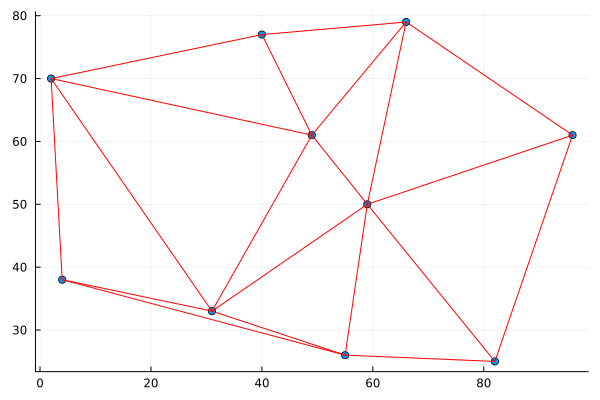

In [9]:
plt = plot()
draw_points(P,plt)
draw_edges(E[1],plt)
display(plt)

Observe que na variável E[2] temos os triângulos salvos. A partir destes triângulos, podemos construir o diagrama de Voronoi através de seus vértices. Neste caso, a ideia consiste em percorremos todos os pontos (que são vértices dos triângulos) e determinarmos os circuncentros destes triângulos. Tais circuncentros serão os vértices dos polígonos de Voronoi. Neste caso, para sabermos como cada aresta será ligada, precisamos ordená-las radialmente. Como sabemos os polígonos de Voronoi serão convexos, podemos determinar o fecho convexo. Neste caso, um algoritmo específico se faz necessário. Não iremos tratar aqui desta determinação. 

Contudo, é importante observar que a forma apresentada tem uma complexidade relacionada a determinação das informações que fornecer os vértices e arestas dos polígonos. Embora, complexo, essas informações são completas, podemos tratar de várias maneiras diferentes informações que demandarão uso dos polígonos, o que é positivo. O problema desta abordagem é quando temos que mudar a métrica. Neste caso, teremos de mudar o algoritmo da triangulação para utilizar outro resultado que não a maximização do ângulo. Isso aumenta o custo do algorítmos e sua complexidade. 

Dessa forma, considere o seguinte questionamento:

Caso desejamos mudar a métrica, será que existe uma forma simples de lidarmos com os polígonos de Voronoi?

A resposta á sim mas algumas limitações são, naturalmente, interpostas. Basicamente, podemos discretizar os espaço delimitado pelos pontos fornecidos e testar a distância (sob qualquer métrica) de cada ponto da discretização aos pontos dados. Ao associarmos uma cor aos pontos que são mais próximos a um dos pontos dado teremos uma região formada por pontos interiores a um certo polígono de Voronoi. Esse algoritmo é simples de programar e tem várias comodidades práticas. 

In [10]:
function draw_colored_points(x::Vector{Float64},y::Vector{Float64},labels::Array{Int64,2},plt::Plots.Plot)
	m = length(x)
	n = length(y)
	A = zeros(Int, m,n)
	for i=1:m 
		for j=1:n 
			A[i,j] = labels[i,j]
		end
	end
	return heatmap!(plt,x,y,A)
end

""" Exemplo de uso 
julia> v = generate_points(10)

julia> voronoi(v;density=1000)


"""
function voronoi(P::Vector{Point2D},metric=(A::Point2D,B::Point2D)->sqrt((B.x-A.x)^2+(B.y-A.y)^2);limx=[0,100],limy=[0,100],density=1000)
	px = [limx[1]:(limx[2]-limx[1])/density:limx[2];]
	py = [limy[1]:(limy[2]-limy[1])/density:limy[2];]
	npx = length(px)
	npy = length(py)
	n = length(P)
	points = Point2D[]
	labels = zeros(Int,npx,npy)
	for i=1:npx 
		for j=1:npy 
			minval = metric(P[1],Point2D(px[i],py[j]))
			imin = 1
			for k=2:n 
				if minval>metric(P[k],Point2D(px[i],py[j]))
					minval = metric(P[k],Point2D(px[i],py[j]))
					imin = k 
				end
			end
			push!(points,Point2D(px[i],py[j]))
			labels[j,i] = imin	
		end	
	end
	plt = plot()
	println("Drawing ... ")
	draw_colored_points(px,py,labels,plt)
	draw_points(P,plt) 
	return plt
end



voronoi

Drawing ... 


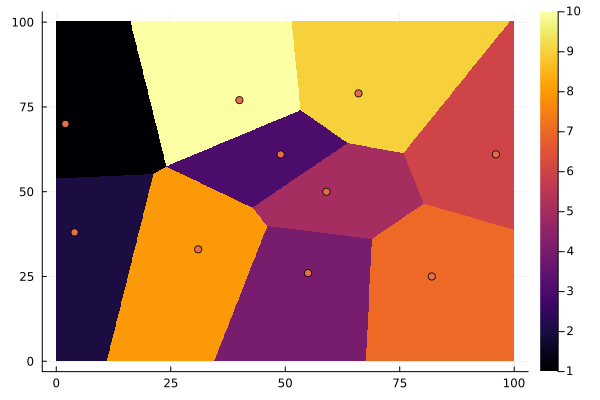

In [11]:
voronoi(P)


# Calculo de área

Um recurso importante para compreendermos o estudo que segue está relacionado ao cálculo de área. Especificamente, gostaríamos de estimar a área de um polígono de Voronoi. Para este objetivo, devemos observar que se conhecermos a área total, a área de um poligono será um percentual da área total. No gráfico acima, a área total é dada pela área de um retângulo de 100x100 unidades de medida. Neste caso, podemos relacionar a quantidade de pontos de nossa discretização no retângulo e correspondê-la com a área do retângulo. Dessa forma, ao considerar os pontos da discretização que estão dentro de um certo poligono de voronoi, teremos  o percentual que este polinômio representa em relação à área total.  

In [36]:
function area_voronoi(P::Vector{Point2D},metric=(A::Point2D,B::Point2D)->sqrt((B.x-A.x)^2+(B.y-A.y)^2);limx=[0,100],limy=[0,100],density=1000)
	px = [limx[1]:(limx[2]-limx[1])/density:limx[2];]
	py = [limy[1]:(limy[2]-limy[1])/density:limy[2];]
	npx = length(px)
	npy = length(py)

	area_total = (limx[2]-limx[1])*(limx[2]-limx[1])
	pts_total = npx*npy 
	
	n = length(P)
	points = Point2D[]
	labels = zeros(Int,npx,npy)
	for i=1:npx 
		for j=1:npy 
			minval = metric(P[1],Point2D(px[i],py[j]))
			imin = 1
			for k=2:n 
				if minval>metric(P[k],Point2D(px[i],py[j]))
					minval = metric(P[k],Point2D(px[i],py[j]))
					imin = k 
				end
			end
			push!(points,Point2D(px[i],py[j]))
			labels[j,i] = imin	
		end	
	end
	s = 0.0
	for k=1:n 
		list = findall(labels.==k)
		pts_pol = length(list)
		area_pol = (pts_pol/pts_total)*area_total
		s = s+area_pol
		println("--------------------------------------------------------------")
		println("Número de pontos no polígono de label $(k) = $(pts_pol)")
		println("Área aproximada do polígono de label  $(k) = $(area_pol)")

	end
	println("Área total aproximada = $(s)")
end


area_voronoi (generic function with 2 methods)

In [37]:
area_voronoi(P)


--------------------------------------------------------------
Número de pontos no polígono de label 1 = 92212
Área aproximada do polígono de label  1 = 920.2785226761251
--------------------------------------------------------------
Número de pontos no polígono de label 2 = 87318
Área aproximada do polígono de label  2 = 871.4362560516406
--------------------------------------------------------------
Número de pontos no polígono de label 3 = 53451
Área aproximada do polígono de label  3 = 533.4425813946293
--------------------------------------------------------------
Número de pontos no polígono de label 4 = 107664
Área aproximada do polígono de label  4 = 1074.4899456188168
--------------------------------------------------------------
Número de pontos no polígono de label 5 = 67143
Área aproximada do polígono de label  5 = 670.0891516076331
--------------------------------------------------------------
Número de pontos no polígono de label 6 = 89503
Área aproximada do polígono de l